In [1]:
from random import choices
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np
import statistics
import math

In [2]:
miu = 0
sigma = 1
rep = 30
var = np.linspace(1,19.9,190)+0.1
var = list(np.around(var,2))
n1 = 100000
n2 = 50000

In [3]:
rand_nums = np.random.normal(miu,sigma,n1)
rand_nums_sorted = np.sort(rand_nums)

# RW approach:

In [4]:
# nre stands for no replcement
p_m1 , p_m2 , p_m3 , p_m3_nre = [],[],[],[]

si_m1 , si_m2 , si_m3 , si_m3_nre = [],[],[],[]

sv_m1 , sv_m2 , sv_m3 , sv_m3_nre = [],[],[],[]

means_m1 , means_m2 , means_m3 , means_m3_nre = [],[],[],[]

var_m1 , var_m2 , var_m3 , var_m3_nre = [],[],[],[]

x1 , x2 , x3 , x3_nre = [],[],[],[]

fb = np.max(rand_nums)
fmean = np.mean(rand_nums) 

for i in var:
    p_m1 = []
    means_m1 , var_m1 = [] , []
    sp = i
    if i <= 2:
        for f in rand_nums:
            p_m1.append((((f-fmean)/(fb-fmean))*(sp/n2-1/n1))+1/n1)
    if i <= 2:
        x1.append(i)
        for j in range(rep):
            choice_m1 = choices(rand_nums,p_m1,k = n2)
            means_m1.append(np.mean(choice_m1))
            var_m1.append(np.var(choice_m1))
            
        si_m1.append(np.mean(means_m1))
        sv_m1.append(np.mean(var_m1))

for i in var:
    p_m2 = []
    means_m2 , var_m2 = [] , []
    sp = i
    if i<= 2:
        for ind in range(len(rand_nums_sorted)):
            p_m2.append((sp/n2-1/n1)*(((ind+1)-((n1+1)/2))/((n1-1)/2)) + 1/n1)
    if i <= 2:
        x2.append(i)
        for j in range(rep):
            choice_m2 = choices(rand_nums_sorted,p_m2,k = n2)
            means_m2.append(np.mean(choice_m2))
            var_m2.append(np.var(choice_m2))

        si_m2.append(np.mean(means_m2))
        sv_m2.append(np.mean(var_m2))

for i in var:
    p_m3 = []
    means_m3 , var_m3 = [] , []
    if i >= 2 and i.is_integer():
        x3.append(int(i))
        q = int(i)
        for j in range(rep):
            choice_m3 = []
            for m in range(n2):
                temp_choices = choices(rand_nums,k=q)
                choice_m3.append(np.max(temp_choices))
            means_m3.append(np.mean(choice_m3))
            var_m3.append(np.var(choice_m3))

        si_m3.append(np.mean(means_m3))
        sv_m3.append(np.mean(var_m3))
            

In [182]:
# x3_nre = []
# var_m3_nre = []
# means_m3_nre = []
# sv_m3_nre = []
# si_m3_nre = []
# p_m3_nre = []

# rand_nums_nre = np.copy(rand_nums)

# for i in var:
#     p_m3_nre = []
#     means_m3_nre , var_m3_nre = [] , []
#     if i >= 2 and i.is_integer():
#         x3_nre.append(int(i))
#         q = int(i)
#         for j in range(rep):
#             rand_nums_nre = np.copy(rand_nums)
#             choice_m3_nre = []
#             for m in range(n2):
#                 temp_choices_nre = choices(rand_nums_nre,k=q)
#                 maxx = np.max(temp_choices_nre)
#                 choice_m3_nre.append(maxx)
#                 rand_nums_nre = np.delete(rand_nums_nre, np.where(rand_nums_nre == maxx))
#             means_m3_nre.append(np.mean(choice_m3_nre))
#             var_m3_nre.append(np.var(choice_m3_nre))

#         si_m3_nre.append(np.mean(means_m3_nre))
#         sv_m3_nre.append(np.mean(var_m3_nre))

# Plots(RW)

In [44]:
# plt.style.use(['dark_background'])

In [75]:
# plt.plot(x1,si_m1,linewidth=5,color = 'cyan',linestyle='--',label='si,1')
# plt.plot(x2,si_m2,label='si,2')
# plt.plot(x3,si_m3,label='si,3')
# plt.legend(loc= 'upper right')
# plt.title('SI vs SP and Q')
# plt.ylabel('SI',size = 20,color = 'white')
# plt.xlabel('SP,Q',size = 20,color = 'white')
# plt.plot([2,2],[0.3,1.6],linestyle = '--',linewidth=1)
# plt.show()

In [50]:
# plt.plot(x1,sv_m1,label='sv,1')
# plt.plot(x2,sv_m2,label='sv,2')
# plt.plot(x3,sv_m3,label='sv,3')
# plt.legend(loc= 'upper right')
# plt.show()

In [37]:
# with plt.style.context(['dark_background', 'presentation']):
#     plt.plot(x1,si_m1,'-ok',markersize=5,markerfacecolor='green',linewidth=3,color = 'cyan',label='si,1')
#     plt.plot(x2,si_m2,label='si,2')
#     plt.plot(x3,si_m3,label='si,3')
#     plt.legend(loc= 'upper right')
# plt.show()

# SUS approach:

In [5]:
def rulet(probs):
    rulet = []
    temp_sum = 0
    for i in range(len(probs)):
        temp_sum += probs[i]
        rulet.append(temp_sum)
    rulet = np.array(rulet)
    return rulet

In [6]:
def index(numbers, ruler):
    inds = []
    for num in numbers:
        if num < ruler[0]:
            inds.append(0)
        else:
            for ind in range(len(ruler)):
                if num >= ruler[ind] and num<ruler[ind+1]:
                    inds.append(ind)
    inds = np.array(inds)
    return inds

In [7]:
def choices_sus(fitness,probs,num):
    fit = np.array(fitness)
    prob = np.array(probs)
    ind = np.argsort(prob)[::-1]
    fit = fit[ind]
    prob = prob[ind]
    rul = rulet(prob)
    init = np.random.random()/num
    numbers = []
    numbers.append(init)
    for n in range(num-1):
        init += 1/num
        numbers.append(init)
#     ind = index(numbers, rul)
    index = np.array(np.searchsorted(rul, numbers))
    output = fit[index]
    return output

In [8]:
si_m1_sus = []
sv_m1_sus =[]
x1_sus = []
fb = np.max(rand_nums)
fmean = np.mean(rand_nums) 
    
for i in var:
    p_m1 = []
    means_m1 , var_m1 = [] , []
    sp = i
    if i <= 2:
        for f in rand_nums:
            p_m1.append((f-fmean)/(fb-fmean)*(sp/n2-1/n1)+1/n1)
    if i <= 2:
        x1_sus.append(i)
        for j in range(rep):
            choice_m1 = choices_sus(rand_nums,p_m1,n2)
            means_m1.append(np.mean(choice_m1))
            var_m1.append(np.var(choice_m1))
            
        si_m1_sus.append(np.mean(means_m1))
        sv_m1_sus.append(np.mean(var_m1))

In [9]:
si_m2_sus = []
sv_m2_sus = []
x2_sus  = []
for i in var:
    p_m2 = []
    means_m2 , var_m2 = [] , []
    sp = i
    if i<= 2:
        for ind in range(len(rand_nums_sorted)):
            p_m2.append((sp/n2-1/n1)*(((ind+1)-((n1+1)/2))/((n1-1)/2)) + 1/n1)
    if i <= 2:
        x2_sus.append(i)
        for j in range(rep):
            choice_m2 = choices_sus(rand_nums_sorted,p_m2,n2)
            means_m2.append(np.mean(choice_m2))
            var_m2.append(np.var(choice_m2))

        si_m2_sus.append(np.mean(means_m2))
        sv_m2_sus.append(np.mean(var_m2))

# Plots(SUS)

In [85]:
# plt.plot(x1_sus,si_m1_sus,label='si_sus,1')
# plt.plot(x2_sus,si_m2_sus,label='si_sus,2')
# plt.plot(x3,si_m3,label='si,3')
# plt.legend(loc= 'upper right')
# plt.show()

In [86]:
# plt.plot(x1,si_m1,label='si,1')
# plt.plot(x2,si_m2,label='si,2')
# plt.plot(x3,si_m3,label='si,3')
# plt.plot(x1_sus,si_m1_sus,label='si_sus,1')
# plt.plot(x2_sus,si_m2_sus,label='si_sus,2')
# plt.legend(loc= 'upper right')
# plt.show()

# Merged Plots (RW & SUS) 

In [39]:
plt.style.use(['dark_background'])

#### SI vs SP & Q

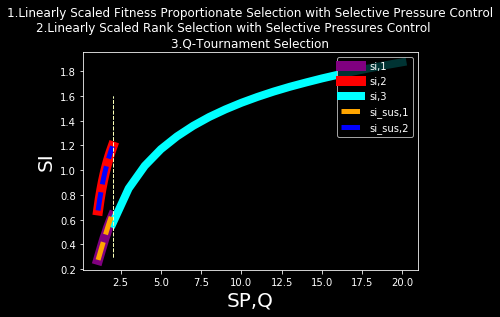

In [40]:
plt.plot(x1,si_m1,linewidth=10,color = 'purple',label='si,1')
plt.plot(x2,si_m2,label='si,2',color = 'red',linewidth=10)
plt.plot(x3,si_m3,label='si,3',color = 'cyan',linewidth=8)

# plt.plot(x3_nre,si_m3_nre,label='si,3',color = 'white',linewidth=8)

plt.plot(x1_sus,si_m1_sus,label='si_sus,1',linewidth=5,linestyle='--',color = 'orange')
plt.plot(x2_sus,si_m2_sus,label='si_sus,2',linewidth=5,linestyle='--',color = 'blue')

plt.legend(loc= 'upper right')
plt.title('1.Linearly Scaled Fitness Proportionate Selection with Selective Pressure Control\n2.Linearly Scaled Rank Selection with Selective Pressures Control\
         \n3.Q-Tournament Selection')
plt.ylabel('SI',size = 20,color = 'white')
plt.xlabel('SP,Q',size = 20,color = 'white')
plt.plot([2,2],[0.3,1.6],linestyle = '--',linewidth=1)

plt.plot([2,2],[0.3,1.6],linestyle = '--',linewidth=1)

plt.show()

#### SV vs SP & Q

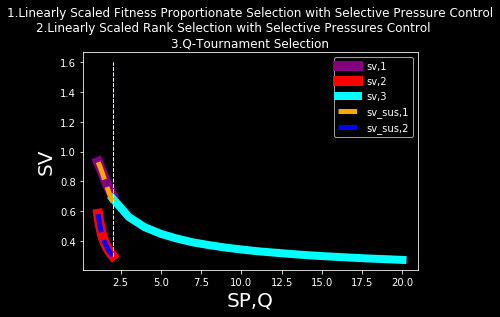

In [41]:
plt.plot(x1,sv_m1,linewidth=10,color = 'purple',label='sv,1')
plt.plot(x2,sv_m2,label='sv,2',color = 'red',linewidth=10)
plt.plot(x3,sv_m3,label='sv,3',color = 'cyan',linewidth=8)

plt.plot(x1_sus,sv_m1_sus,label='sv_sus,1',linewidth=5,linestyle='--',color = 'orange')
plt.plot(x2_sus,sv_m2_sus,label='sv_sus,2',linewidth=5,linestyle='--',color = 'blue')

plt.legend(loc= 'upper right')
plt.title('SV vs (SP & Q)')
plt.ylabel('SV',size = 20,color = 'white')
plt.xlabel('SP,Q',size = 20,color = 'white')
plt.plot([2,2],[0.3,1.6],linestyle = '--',linewidth=1)

plt.plot([2,2],[0.3,1.6],linestyle = '--',linewidth=1)

plt.title('1.Linearly Scaled Fitness Proportionate Selection with Selective Pressure Control\n2.Linearly Scaled Rank Selection with Selective Pressures Control\
         \n3.Q-Tournament Selection')

plt.show()

#### SV vs SI

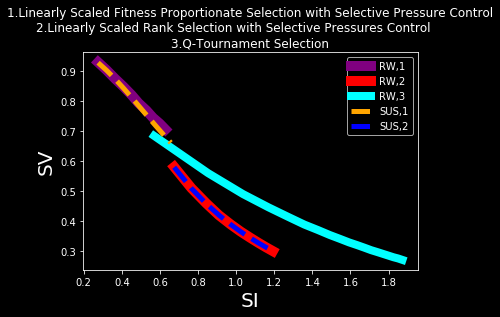

In [42]:
plt.plot(si_m1,sv_m1,linewidth=10,color = 'purple',label='RW,1')
plt.plot(si_m2,sv_m2,label='RW,2',color = 'red',linewidth=10)
plt.plot(si_m3,sv_m3,label='RW,3',color = 'cyan',linewidth=8)

plt.plot(si_m1_sus,sv_m1_sus,label='SUS,1',linewidth=5,linestyle='--',color = 'orange')
plt.plot(si_m2_sus,sv_m2_sus,label='SUS,2',linewidth=5,linestyle='--',color = 'blue')

plt.title('1.Linearly Scaled Fitness Proportionate Selection with Selective Pressure Control\n2.Linearly Scaled Rank Selection with Selective Pressures Control\
         \n3.Q-Tournament Selection')

plt.legend(loc= 'upper right')

plt.ylabel('SV',size = 20,color = 'white')
plt.xlabel('SI',size = 20,color = 'white')

plt.show()
